In [28]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.utils import to_categorical

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
root_dir = '/kaggle/input/cataract-classification-dataset/train'

In [31]:
folder_counts={}

for folder in os.listdir(root_dir):
    folder_path=os.path.join(root_dir,folder)
    if os.path.isdir(folder_path):
        num_images=len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,name)) and name.lower().endswith(('.png','.jpg','.jpeg'))])
        folder_counts[folder]=num_images
        
folders=list(folder_counts.keys())
counts=list(folder_counts.values())
    

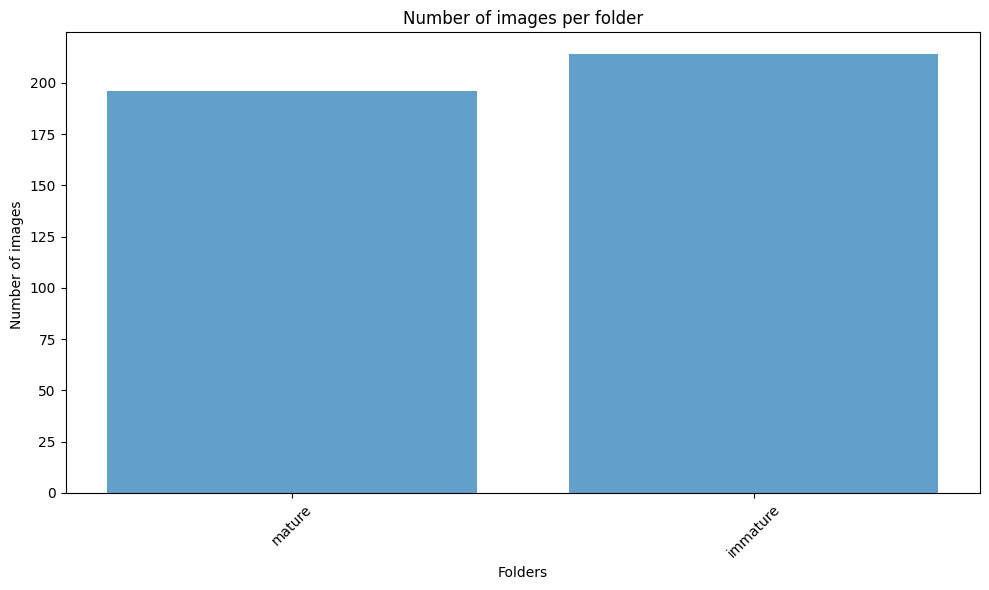

In [32]:
plt.figure(figsize=(10,6))
plt.bar(range(len(folders)),counts,align='center',alpha=0.7)
plt.xticks(range(len(folders)),folders,rotation=45)
plt.xlabel('Folders')
plt.ylabel('Number of images ')
plt.title('Number of images per folder')
plt.tight_layout()
plt.show()

In [33]:
df='/kaggle/input/cataract-classification-dataset/train'

In [34]:
immature = os.listdir(os.path.join(df, '/kaggle/input/cataract-classification-dataset/train/immature'))

mature = os.listdir(os.path.join(df, '/kaggle/input/cataract-classification-dataset/train/mature'))

In [35]:
X=[]
Y=[]

In [36]:
for i, image_name in enumerate(immature):
    file_path = os.path.join(df, '/kaggle/input/cataract-classification-dataset/train/immature', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(0)

In [37]:
for i, image_name in enumerate(mature):
    file_path = os.path.join(df, '/kaggle/input/cataract-classification-dataset/train/mature', image_name)
    image = Image.open(file_path)
    image = image.resize((64, 64), resample=Image.BOX)
    X.append(np.array(image))
    Y.append(1)

In [38]:
X[1]

array([[[223, 136, 102],
        [206, 104,  73],
        [215, 110,  80],
        ...,
        [207, 144, 102],
        [196, 125,  81],
        [198, 122,  78]],

       [[213, 130, 102],
        [221, 136, 111],
        [211, 128, 106],
        ...,
        [191, 132,  94],
        [187, 122,  83],
        [206, 144, 109]],

       [[218, 121,  90],
        [218, 127, 100],
        [224, 134, 107],
        ...,
        [202, 141, 105],
        [190, 124,  85],
        [195, 128,  93]],

       ...,

       [[189, 121, 102],
        [191, 116,  89],
        [175,  93,  67],
        ...,
        [133,  71,  45],
        [150,  99,  77],
        [130,  69,  48]],

       [[186, 118,  97],
        [185, 109,  81],
        [180, 112,  82],
        ...,
        [138,  76,  53],
        [133,  76,  55],
        [128,  63,  44]],

       [[177, 102,  76],
        [181,  99,  72],
        [183, 113,  84],
        ...,
        [136,  71,  51],
        [128,  71,  50],
        [135,  72,  52]]

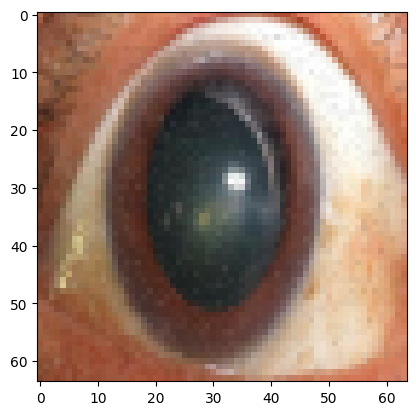

In [39]:
image_array=X[5]
plt.imshow(image_array)
plt.show()

In [40]:
len(Y)

410

In [41]:
len(X)

410

In [42]:
Y=np.array(Y)

In [43]:
Y.shape

(410,)

In [44]:
X=np.array(X)

In [45]:
X.shape

(410, 64, 64, 3)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [48]:
print(x_train.shape)
print(y_train.shape)

(328, 64, 64, 3)
(328,)


In [49]:
print(x_test.shape)
print(y_test.shape)

(82, 64, 64, 3)
(82,)


In [50]:
unique_classes_test=np.unique(y_test)
print("unique classes in y_test:",unique_classes_test)

unique classes in y_test: [0 1]


In [51]:
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [52]:
y_train[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [53]:
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [56]:
num_classes=2
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

batch_size=32
history=model.fit(x_train,y_train,batch_size=batch_size,verbose=1,epochs=10,validation_data=(x_test,y_test),shuffle=False)

model.save('cataract-classificatio.h5')

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.5005 - loss: 1.8206 - val_accuracy: 0.5244 - val_loss: 0.6904
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5759 - loss: 0.6769 - val_accuracy: 0.7561 - val_loss: 0.6126
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.6777 - loss: 0.5903 - val_accuracy: 0.7805 - val_loss: 0.5043
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8066 - loss: 0.4745 - val_accuracy: 0.9024 - val_loss: 0.3384
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8350 - loss: 0.3797 - val_accuracy: 0.9634 - val_loss: 0.2187
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9156 - loss: 0.2607 - val_accuracy: 0.9268 - val_loss: 0.1427
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9567 - loss: 0.1496 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9565 - loss: 0.1271 - val_accuracy: 1.0000

In [57]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(f'Test loss:{loss:.4f}')
print(f'Test accuracy:{accuracy*100:.2f}%')

Test loss:0.0004
Test accuracy:100.00%


In [58]:
from sklearn.metrics import classification_report,confusion_matrix

y_test_labels=np.argmax(y_test,axis=1)
y_pred=np.argmax(model.predict(x_test),axis=1)

print("Classification Report:")
print(classification_report(y_test_labels,y_pred))

print('Confusion matrix:')
print(confusion_matrix(y_test_labels,y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Confusion matrix:
[[43  0]
 [ 0 39]]


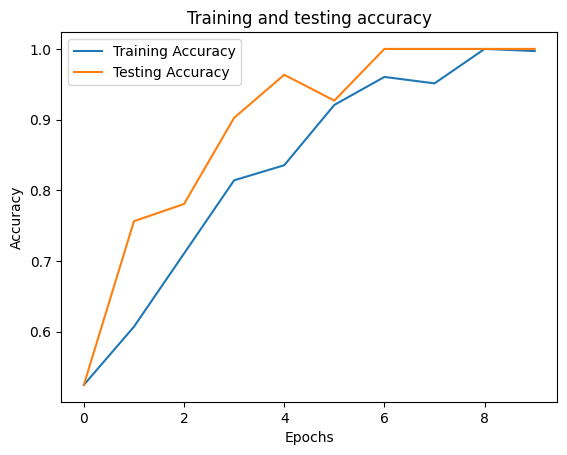

In [61]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and testing accuracy')
plt.legend()
plt.show()

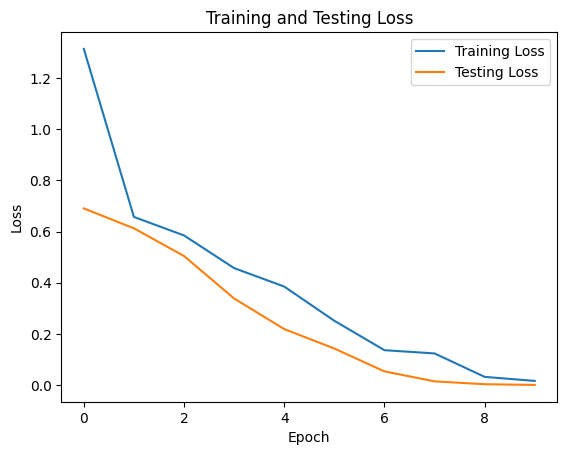

In [62]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

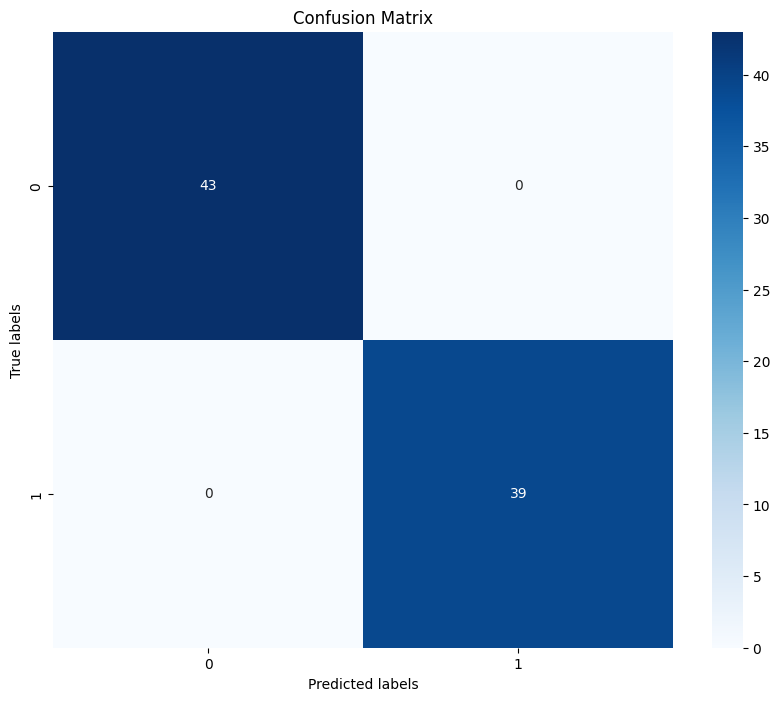

In [64]:
import seaborn as sns
conf_matrix=confusion_matrix(y_test_labels,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

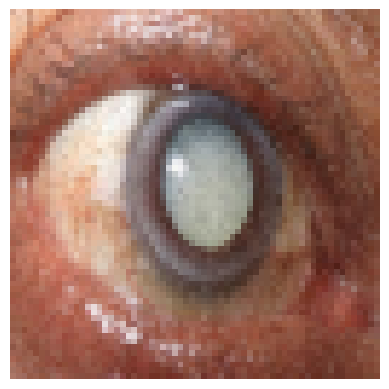

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Actual class: mature
Predicted Class: mature


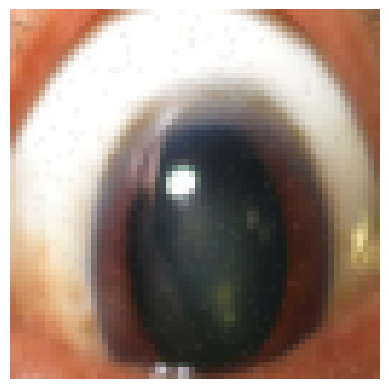

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Actual class: immature
Predicted Class: immature


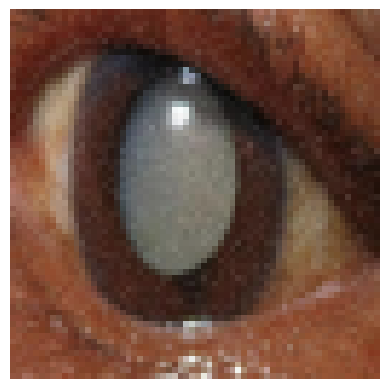

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Actual class: mature
Predicted Class: mature


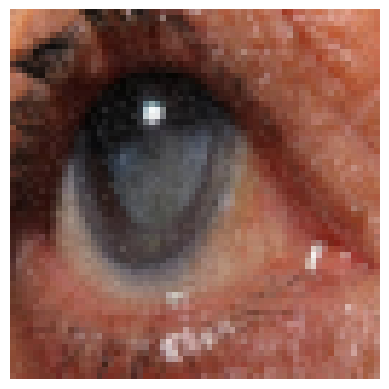

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Actual class: mature
Predicted Class: mature


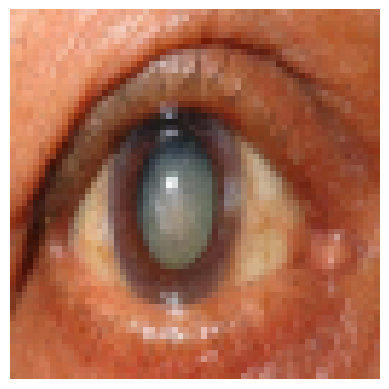

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Actual class: mature
Predicted Class: mature


In [67]:
model=tf.keras.models.load_model('cataract-classificatio.h5')

for i in range(5):
    current_image=x_test[i]
    actual_label=y_test[i]
    
    plt.imshow(current_image)
    plt.axis('off')
    plt.show()
    
    batch_prediction=model.predict(np.expand_dims(current_image,axis=0))
    predicted_label=np.argmax(batch_prediction)
    
    disease_labels=['immature','mature']
    predicted_class=disease_labels[predicted_label]
    actual_class=disease_labels[np.argmax(actual_label)]
    
    print('Actual class:',actual_class)
    print('Predicted Class:',predicted_class)
    